# Implementation of K-Nearest Neighbors Algorithm from scratch

#### KNN classifier

In [1]:
class KNNClassifier:
    
    
    # k: number of neighbors, default value: 5
    # dist_metric: 1 -> Manhattan Distance, 2 -> Euclidean Distance; default value: 2
    def __init__(self, k = 5, dist_metric = 2, X=[], y=[]):
        self.k = k
        self.X = list(X)
        self.y = list(y)
        self.dist_metric = dist_metric
        # normalized dataset
        self.X_norm = self.normalize_dataset(X, self.get_min_max(X))
    
    
    def get_min_max(self, dataset):
        # returns a matrix containing minimum (0) and maximum (1) values per column
        norm = list()
        for i in range(len(dataset[0])):
            col_values = [ row[i] for row in dataset]
            norm.append([min(col_values), max(col_values)])
        return norm
    
    
    # rescale dataset columns to the range 0-1
    def normalize_dataset(self, dataset, minmax):
        normalized = []
        for row in dataset:
            # dataset rows loop
            output_row = []
            for i in range(len(row)):
                # rows input features loop
                output_row.append((row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0]))
            normalized.append(output_row)
        return normalized
    
    
    def minkowski_distance(self, point1, point2):
        # p = 1 -> Manhattan Distance
        # p = 2 -> Euclidean Distance
        dim = len(point1)
        distance = 0
        for d in range(dim):
            distance += abs(point1[d] - point2[d])**self.dist_metric
       
        distance = distance**(1/self.dist_metric)
        return distance
    
    
    def get_neighbors(self, test_row):
        distances = list()
        for i in range(len(self.X_norm)):
            train_row = self.X_norm[i]
            dist = self.minkowski_distance(test_row, train_row)
            distances.append((i, dist))
            
        # sort by ascending distances
        distances.sort(key = lambda tup: tup[1])
        neighbors = list()
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors
    
    
    def get_k_neighbors_class(self, distances):
        d = {}
        for i in distances:
            y = self.y[i]
            if d.get(y) is None:
                d[y] = 1
            else:
                d[y] += 1
        output = 0
        c = None
        for k,v in d.items():
            if v > output:
                output = v
                c = k
        return k
    
    
    # if append_to_dataset is True, the row will be added to the dataset. Default: True
    def predict(self, row, append_to_dataset=True):
        if append_to_dataset:
            self.X.append(row)
            self.X_norm = self.normalize_dataset(self.X, self.get_min_max(self.X))
            self.y.append(prediction)
        
        neighbors = self.get_neighbors(row)
        prediction = self.get_k_neighbors_class(neighbors)
        return prediction
    
    
    def evaluate(self, test_dataset, classes):
        # Normalization of test_dataset
        predictions = list()
        for row in test_dataset:
            d = self.X[:]
            d.append(row)
            minmax = self.get_min_max(d)
            n = self.normalize_dataset(d, minmax)
            normalized_row = n[-1]
            predictions.append(self.predict(normalized_row, append_to_dataset=False))
        
        correct_predictions = 0
        
        for i in range(len(predictions)):
            if predictions[i] == classes[i]:
                correct_predictions +=1
        return correct_predictions / len(classes)
    

<hr>

In this notebook we use the dataset *'Pokemon with stats'* to predict whether a pokemon is legendary or not

[Dataset available at this link](https://www.kaggle.com/datasets/abcsds/pokemon/code) 


#### About Dataset

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The data as described by Myles O'Neill is:
* **`#`** ID for each pokemon
* **`Name`** Name of each pokemon
* **`Type 1`** Each pokemon has a type, this determines weakness/resistance to attacks
* **`Type 2`** Some pokemon are dual type and have 2
* **`Total`** sum of all stats that come after this, a general guide to how strong a pokemon is
* **`HP`** hit points, or health, defines how much damage a pokemon can withstand before fainting
* **`Attack`** the base modifier for normal attacks (eg. Scratch, Punch)
* **`Defense`** the base damage resistance against normal attacks
* **`SP Atk`** special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* **`SP Def`** the base damage resistance against special attacks
* **`Speed`** determines which pokemon attacks first each round

<hr>

**Load Dataset**

In [2]:
import csv

# contains the columns labels of the dataset
columns = []
# contains all rows of the dataset
pokemon_dataset = []

with open("Pokemon.csv") as file:
    reader = csv.reader(file)
    columns = next(reader)
    for row in reader:
        pokemon_dataset.append(row)
    

In [3]:
print(columns)
print("\n")
# print first 5 row of pokemon_dataset
for i in pokemon_dataset[:5]:
    print(i)

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


['1', 'Bulbasaur', 'Grass', 'Poison', '318', '45', '49', '49', '65', '65', '45', '1', 'False']
['2', 'Ivysaur', 'Grass', 'Poison', '405', '60', '62', '63', '80', '80', '60', '1', 'False']
['3', 'Venusaur', 'Grass', 'Poison', '525', '80', '82', '83', '100', '100', '80', '1', 'False']
['3', 'VenusaurMega Venusaur', 'Grass', 'Poison', '625', '80', '100', '123', '122', '120', '80', '1', 'False']
['4', 'Charmander', 'Fire', '', '309', '39', '52', '43', '60', '50', '65', '1', 'False']


*we are only interested in the columns:* 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'

In [4]:
input_columns = columns[5:11]
print(input_columns)
input_features = [ [ int(col) for col in row[5:11] ] for row in pokemon_dataset ]
print(input_features[:1])
output_column = columns[-1:]
print(output_column)

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
[[45, 49, 49, 65, 65, 45]]
['Legendary']


In [5]:
# 1 if pokemn is legendary, 0 otherwise
output_labels = [ 0 if row[-1] == "False" else 1 for row in pokemon_dataset ]

In [6]:
from sklearn.model_selection import train_test_split

<i>sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)</i>

Split arrays or matrices into random train and test subsets.

**Some parameters:**
* *test_size: float or int, default=None* <br> If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
* *random_state: int, RandomState instance or None, default=None* <br>Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.
* *stratify: array-like, default=None* <br> If not None, data is split in a stratified fashion, using this as the class labels.

**Returns:** *splittinglist, length=2 * len(arrays)* -> List containing train-test split of inputs.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    input_features,
    output_labels,
    test_size=0.3,
    random_state=42,
    stratify=output_labels
)

print(f'Number of elements in train dataset: {len(X_train)}')
print(f'Number of elements in test dataset: {len(X_test)}')

Number of elements in train dataset: 560
Number of elements in test dataset: 240


In [8]:
legendary_classifier = KNNClassifier(k=7, X=X_train, y=y_train)
accuracy = legendary_classifier.evaluate(X_test, y_test)
print(f'For k = 7 the accuracy is: {accuracy}')

For k = 7 the accuracy is: 0.875


In [9]:
import matplotlib.pyplot as plt

def evaluate_on_k(features, labels, dist_metric=2):
    k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19]
    accuracies = []
    X_train, X_test, y_train, y_test = train_test_split(
        features,
        labels,
        test_size=0.3,
        random_state=42,
        stratify=labels
    )
    
    for k in k_values:
        c = KNNClassifier(k=k, X=X_train, y=y_train, dist_metric=dist_metric)
        accuracy = c.evaluate(X_test, y_test)
        accuracies.append(accuracy)
        print(f"k -> {k}; accuracy -> {accuracy}")
    
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.scatter(k_values, accuracies)
    ax.set_title("Accuracy over K")
    ax.set_xlabel("K number of neighbors")
    ax.set_ylabel("Accuracy")
    for i, label in enumerate(k_values):
        plt.annotate(f"K={label}", (k_values[i], accuracies[i]))
    
    plt.show()

k -> 3; accuracy -> 0.9375
k -> 5; accuracy -> 0.9041666666666667
k -> 7; accuracy -> 0.875
k -> 9; accuracy -> 0.8666666666666667
k -> 11; accuracy -> 0.8541666666666666
k -> 13; accuracy -> 0.85
k -> 15; accuracy -> 0.8458333333333333
k -> 17; accuracy -> 0.8375
k -> 19; accuracy -> 0.8166666666666667


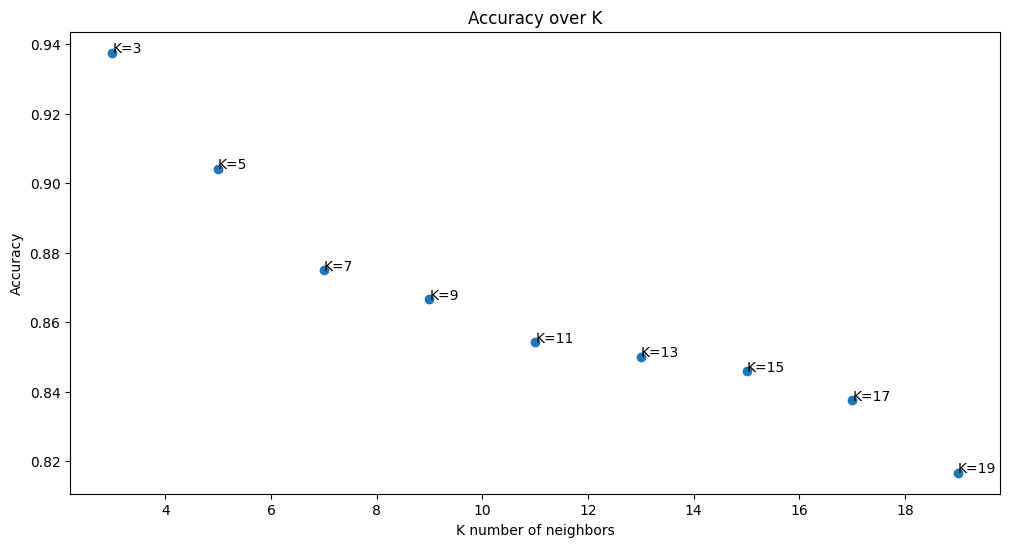

In [10]:
evaluate_on_k(input_features, output_labels)

With k=3 the model has the highest accuracy

**If instead we use Manhattan Distance:**

k -> 3; accuracy -> 0.9125
k -> 5; accuracy -> 0.8791666666666667
k -> 7; accuracy -> 0.8708333333333333
k -> 9; accuracy -> 0.8583333333333333
k -> 11; accuracy -> 0.85
k -> 13; accuracy -> 0.8458333333333333
k -> 15; accuracy -> 0.8333333333333334
k -> 17; accuracy -> 0.825
k -> 19; accuracy -> 0.8208333333333333


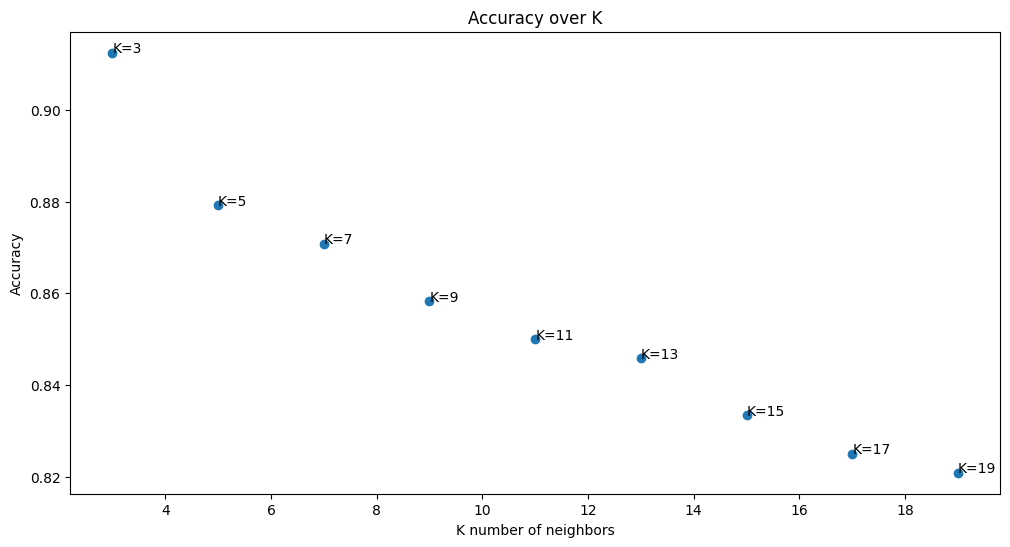

In [11]:
evaluate_on_k(input_features, output_labels, dist_metric=1)

Also in this case with k=3 the model has the highest accuracy
